# Spotify Music Popularity Capstone - Pre-processing and Training Data Development

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats

In [2]:
# load the dataframe
df = pd.read_csv("../Data/Merged_Data7.csv", index_col=[0])
df.head()

,track_id,track_name,track_genre,artist_name,track_popularity,popular_year,Top100,key,acousticness,danceability,...,modality,speechiness,tempo,time_signature,valence,second_artist,artist_country,collaboration,prevTop100,Label
0,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,hip-hop,Eminem,88.0,2000,Y,5.0,0.0302,0.949,...,0.0,0.0572,104.504,4.0,0.760,NaN,United States,N,N,"Aftermath, Interscope, Shady"
12,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,hip-hop,Outkast,82.0,2001,Y,4.0,0.1430,0.843,...,0.0,0.2690,94.948,4.0,0.613,NaN,NaN,N,N,NaN
13,3UmaczJpikHgJFyBTAJVoz,Stan,hip-hop,Eminem,85.0,2001,Y,6.0,0.0371,0.780,...,0.0,0.2380,80.063,4.0,0.507,NaN,United States,N,N,"Aftermath, Interscope, Shady"
25,3Gf5nttwcX9aaSQXRWidEZ,Ride Wit Me,hip-hop,Nelly,75.0,2001,Y,7.0,0.0616,0.850,...,1.0,0.0478,101.875,4.0,0.722,NaN,United States,N,N,Universal Motown
31,6glsMWIMIxQ4BedzLqGVi4,"So Fresh, So Clean",hip-hop,Outkast,72.0,0,N,5.0,0.0281,0.725,...,0.0,0.3320,166.028,3.0,0.915,NaN,NaN,N,N,NaN


In [3]:
df = df.reset_index(drop=True)

In [4]:
df.head()

,track_id,track_name,track_genre,artist_name,track_popularity,popular_year,Top100,key,acousticness,danceability,...,modality,speechiness,tempo,time_signature,valence,second_artist,artist_country,collaboration,prevTop100,Label
0,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,hip-hop,Eminem,88.0,2000,Y,5.0,0.0302,0.949,...,0.0,0.0572,104.504,4.0,0.760,NaN,United States,N,N,"Aftermath, Interscope, Shady"
1,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,hip-hop,Outkast,82.0,2001,Y,4.0,0.1430,0.843,...,0.0,0.2690,94.948,4.0,0.613,NaN,NaN,N,N,NaN
2,3UmaczJpikHgJFyBTAJVoz,Stan,hip-hop,Eminem,85.0,2001,Y,6.0,0.0371,0.780,...,0.0,0.2380,80.063,4.0,0.507,NaN,United States,N,N,"Aftermath, Interscope, Shady"
3,3Gf5nttwcX9aaSQXRWidEZ,Ride Wit Me,hip-hop,Nelly,75.0,2001,Y,7.0,0.0616,0.850,...,1.0,0.0478,101.875,4.0,0.722,NaN,United States,N,N,Universal Motown
4,6glsMWIMIxQ4BedzLqGVi4,"So Fresh, So Clean",hip-hop,Outkast,72.0,0,N,5.0,0.0281,0.725,...,0.0,0.3320,166.028,3.0,0.915,NaN,NaN,N,N,NaN


In [5]:
df.dtypes

track_id             object
track_name           object
track_genre          object
artist_name          object
track_popularity    float64
popular_year          int64
Top100               object
key                 float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
modality            float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
second_artist        object
artist_country       object
collaboration        object
prevTop100           object
Label                object
dtype: object

## Let's do some additional cleaning before we go further

In [6]:
# remove columns that won't have any predictive value: track_id, track_name
# remove track_popularity since this will most likely be highly correlated to dependent variable
# remove second_artist since we created "collaboration" with that column
# remove prevTop100 until can figure out how to correctly create that
df = df.drop(['track_id', 'track_name', 'prevTop100', 'track_popularity', 'second_artist', 'popular_year'], axis=1)

In [7]:
df.head()

,track_genre,artist_name,Top100,key,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,modality,speechiness,tempo,time_signature,valence,artist_country,collaboration,Label
0,hip-hop,Eminem,Y,5.0,0.0302,0.949,284200.0,0.661,0.000000,0.0454,-4.244,0.0,0.0572,104.504,4.0,0.760,United States,N,"Aftermath, Interscope, Shady"
1,hip-hop,Outkast,Y,4.0,0.1430,0.843,270507.0,0.806,0.000000,0.0771,-5.946,0.0,0.2690,94.948,4.0,0.613,NaN,N,NaN
2,hip-hop,Eminem,Y,6.0,0.0371,0.780,404107.0,0.768,0.000002,0.5180,-4.325,0.0,0.2380,80.063,4.0,0.507,United States,N,"Aftermath, Interscope, Shady"
3,hip-hop,Nelly,Y,7.0,0.0616,0.850,291782.0,0.700,0.000002,0.2440,-6.490,1.0,0.0478,101.875,4.0,0.722,United States,N,Universal Motown
4,hip-hop,Outkast,N,5.0,0.0281,0.725,240027.0,0.640,0.000000,0.0990,-7.905,0.0,0.3320,166.028,3.0,0.915,NaN,N,NaN


In [8]:
# check number of unique value counts in each column to check if they are categorical, in addition to object type above
df.nunique()

track_genre            15
artist_name         22772
Top100                  2
key                    12
acousticness         5032
danceability         1314
duration_ms         84943
energy               2729
instrumentalness     5401
liveness             1753
loudness            30094
modality                2
speechiness          1545
tempo               89703
time_signature          5
valence              1710
artist_country        131
collaboration           2
Label                2087
dtype: int64

In [9]:
#df.key.value_counts()

In [10]:
#df.modality.value_counts()

In [11]:
#df.time_signature.value_counts()

In [12]:
df.head()

,track_genre,artist_name,Top100,key,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,modality,speechiness,tempo,time_signature,valence,artist_country,collaboration,Label
0,hip-hop,Eminem,Y,5.0,0.0302,0.949,284200.0,0.661,0.000000,0.0454,-4.244,0.0,0.0572,104.504,4.0,0.760,United States,N,"Aftermath, Interscope, Shady"
1,hip-hop,Outkast,Y,4.0,0.1430,0.843,270507.0,0.806,0.000000,0.0771,-5.946,0.0,0.2690,94.948,4.0,0.613,NaN,N,NaN
2,hip-hop,Eminem,Y,6.0,0.0371,0.780,404107.0,0.768,0.000002,0.5180,-4.325,0.0,0.2380,80.063,4.0,0.507,United States,N,"Aftermath, Interscope, Shady"
3,hip-hop,Nelly,Y,7.0,0.0616,0.850,291782.0,0.700,0.000002,0.2440,-6.490,1.0,0.0478,101.875,4.0,0.722,United States,N,Universal Motown
4,hip-hop,Outkast,N,5.0,0.0281,0.725,240027.0,0.640,0.000000,0.0990,-7.905,0.0,0.3320,166.028,3.0,0.915,NaN,N,NaN


In [13]:
# convert key, modality and time_signature to object from int64
#df['modality'].apply(str)
df.modality = df.modality.astype(str)
df.time_signature = df.time_signature.astype(str)
df.key = df.key.astype(str)

In [14]:
# Let's check the variety of different values in Label
df.Label.value_counts()

Antilles                            14068
Atlantic                             2812
Warner Bros.                         2427
Interscope                           2001
RCA                                  1851
                                    ...  
White/Hot, Island, Domino               1
Flying Nun, Bella Union                 1
Highwheel                               1
Don Giovanni / Sister Polygon           1
MoreAboutMusic / Blackball Muzik        1
Name: Label, Length: 2087, dtype: int64

In [15]:
# with some many different Labels, I'll group any Labels occuring less than 5 times into "Other"
counts = df['Label'].value_counts()
mask = df['Label'].isin(counts[counts < 5].index)
df['Label'][mask] = 'Other'

/var/folders/rc/20gvvbw10mg1xrcm82p5g4tm0000gn/T/ipykernel_39958/822863754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][mask] = 'Other'


In [16]:
# This puts 1,410 labels into 'Other'
len(df[df['Label'] == 'Other'])

1410

## Create dummy variables for categorical data types

In [17]:
# isolate categorical variables
categorical_features = df.select_dtypes(include=['object'])

# exclude dependent variable
categorical_features = categorical_features.drop(columns = ['Top100'])
#categorical_columns

In [18]:
#dfo = df.select_dtypes(include=['object']) # select object type columns
df = pd.concat([df.drop(categorical_features, axis=1), pd.get_dummies(categorical_features)], axis=1)

dfo = df.select_dtypes(include=['object']) # select object type columns
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [19]:
df.head()

,Top100,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Label_i! Records,Label_iDEAL,Label_independent,Label_mau5trap,Label_nterscope,"Label_will.i.am, A&M","Label_will.i.am, Cherrytree, Interscope, Dandyville",Label_~scape,Label_â„— 2019 Speakerbox Recordings Limited under,Label_å†¬æ¨¹ç¤¾
0,Y,0.0302,0.949,284200.0,0.661,0.000000,0.0454,-4.244,0.0572,104.504,...,0,0,0,0,0,0,0,0,0,0
1,Y,0.1430,0.843,270507.0,0.806,0.000000,0.0771,-5.946,0.2690,94.948,...,0,0,0,0,0,0,0,0,0,0
2,Y,0.0371,0.780,404107.0,0.768,0.000002,0.5180,-4.325,0.2380,80.063,...,0,0,0,0,0,0,0,0,0,0
3,Y,0.0616,0.850,291782.0,0.700,0.000002,0.2440,-6.490,0.0478,101.875,...,0,0,0,0,0,0,0,0,0,0
4,N,0.0281,0.725,240027.0,0.640,0.000000,0.0990,-7.905,0.3320,166.028,...,0,0,0,0,0,0,0,0,0,0


## Scaling and Transforming Numeric Features

In [20]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])

In [21]:
numeric_column_names = list(numeric_df.columns)

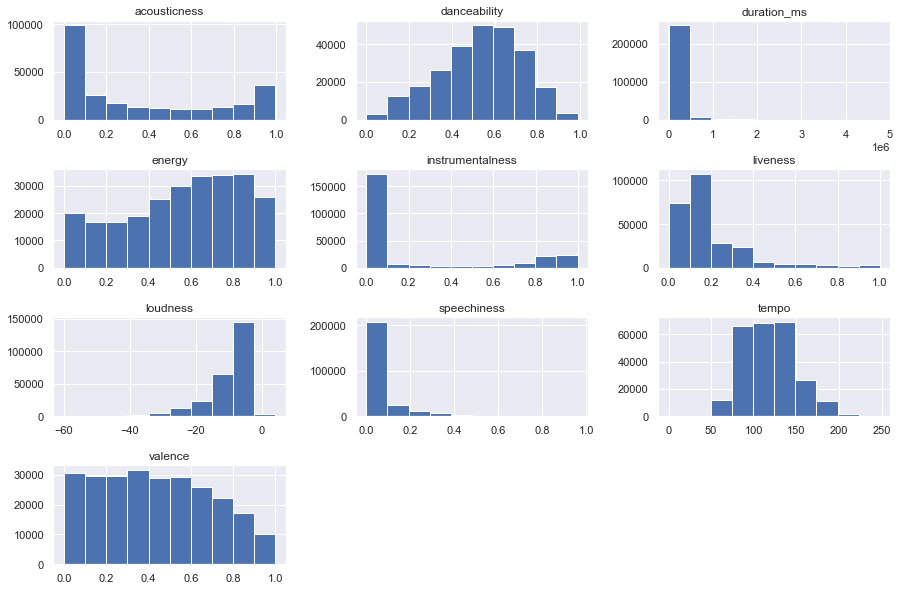

In [22]:
# let's look at the distribution of numeric variables
numeric_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

It looks like duration_ms and speechiness may have outliers

In [23]:
df.duration_ms.describe()

count    2.550960e+05
mean     2.417881e+05
std      1.211004e+05
min      8.213000e+03
25%      1.833470e+05
50%      2.246270e+05
75%      2.749940e+05
max      4.771640e+06
Name: duration_ms, dtype: float64

In [24]:
df.speechiness.describe()

count    255096.000000
mean          0.078088
std           0.087338
min           0.000000
25%           0.034900
50%           0.044500
75%           0.074100
max           0.961000
Name: speechiness, dtype: float64

### Let's first try scaling with MinMax

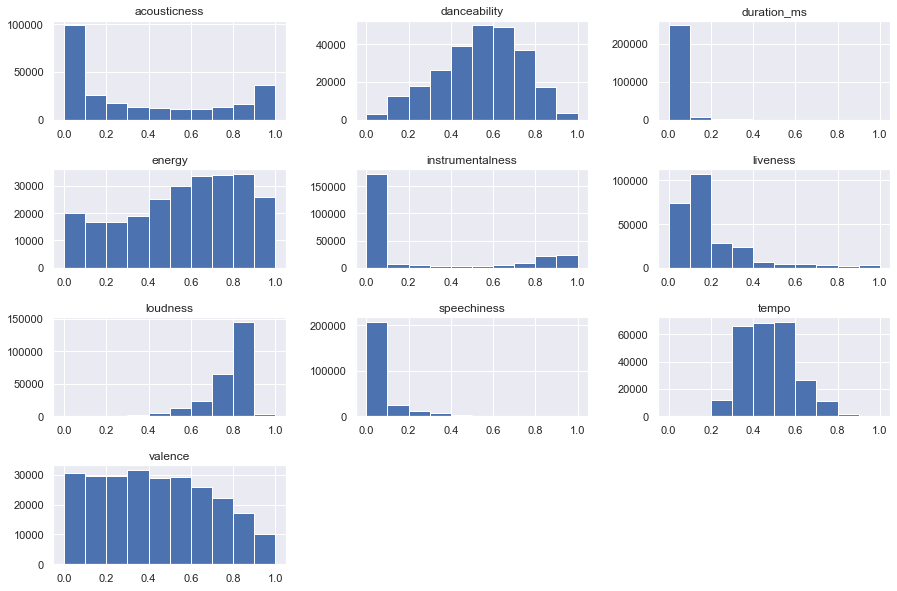

In [25]:
# this should make all values between 0 and 1
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# create model, fit, and transform
MM_scaler = MinMaxScaler()
numeric_df_mm = MM_scaler.fit_transform(numeric_df)

# convert back to dataframe for plotting
numeric_df_mm = pd.DataFrame(numeric_df_mm)
numeric_df_mm.columns = numeric_column_names

numeric_df_mm.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

### Now let's try Standardization

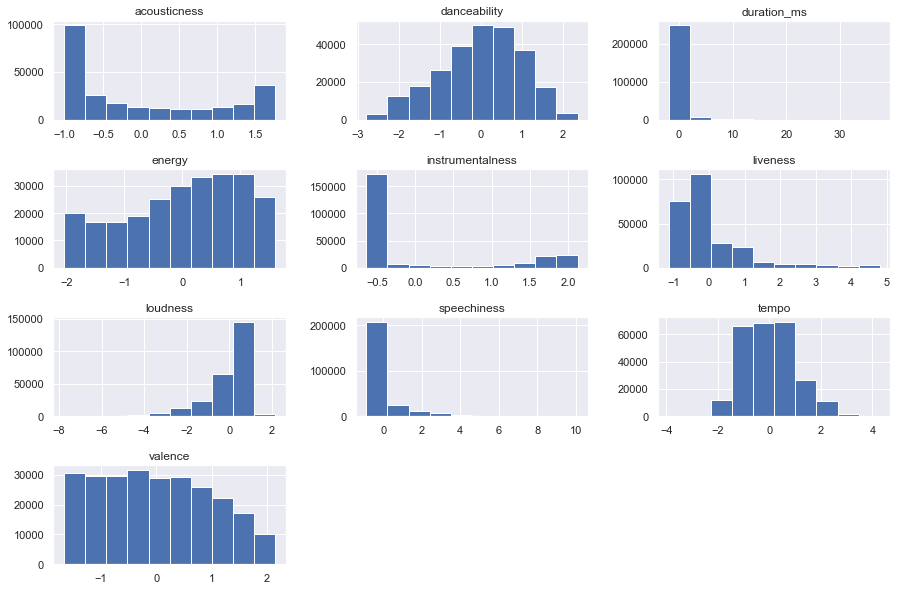

In [26]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# create model, fit, and transform
SS_scaler = StandardScaler()
numeric_df_ss = SS_scaler.fit_transform(numeric_df)

# convert back to dataframe for plotting
numeric_df_ss = pd.DataFrame(numeric_df_ss)
numeric_df_ss.columns = numeric_column_names

numeric_df_ss.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [27]:
#df.acousticness

In [28]:
#numeric_df_mm.acousticness

In [29]:
#df.danceability

In [30]:
#numeric_df_mm.danceability

In [31]:
#update numeric column values with the normalized Min-Max values
for column_name in numeric_column_names:
    df[column_name] = numeric_df_mm[column_name]


### Split data into training and testing subsets

#### Question: should I not use getdummies on the dependent variable 'Top100'

In [32]:
# Create the X and y matrices from the dataframe
X = df.drop(columns = ['Top100'])
y = df['Top100']

In [33]:
# from sklearn.model_selection import train_test_split; reserve 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

### -- Ignore below for now --

In [34]:
#find which columns contain Top100
# df2 = df.filter(regex='Top100')
# print(df2)

# previous top 100 section

This section is intended to decipher if an artist has previously had a 

df1.artist_name.value_counts()

df1['prevTop100'] = 'N'

df1[df1['artist_name'] == 'Eminem']

#### what I need to accomplish:

for each row (track), determine if the artist of that track has previously had a track with a Top100 = "Y".  If this is true, then I want to populate the "prevTop100" column with a "Y". Note that this should only occur for Top100 songs that are not the first Top Hit for the artist (e.g. their first Top100 hit should have a "prevTop100" value of N).

In the Britney Spears example below, the first two tracks, which were in the year 2000, would have prevTop100 values of "N", while all of the tracks in 2001 and forward would have a prevTop100 value of "Y".
    


#df1[df1['artist_name'] == 'Eminem' & df1['Top100'] == "Y"]
display(df1.loc[(df1['artist_name'] == 'Britney Spears') & (df1['Top100'] == 'Y')])

df1[df1['Top100'] == 'Y']

# create the dataframe to compare against
top100df = df1[df1['Top100'] == 'Y']
top100df.head(4)


# in this first for loop, I'm trying to create a "temporary" dataframe that has each artist with a Top100 hit, and specifically find the year of their first Top100 hit
for artist in top100df['artist_name']:
    #temp_df = (top100df[top100df['artist_name'] == artist] & top100df[top100df['popular_year']].min())
    temp_df = df1.loc[(df1['artist_name'] == artist) & (df1['popular_year'].min())]
    print(temp_df)

In [35]:
# once I'm able to get that for loop right, I need to be able to 

top100df.Top100.value_counts()

for row in df1['prevTop100']:
    if df1['artist_name'] in top100df['artist_name']:
        print('yes')
    else:
        print('no')

In [36]:
# for row in df6['prev_Top100']:
#     if df6['Top100'] = 'N':
#         skip
#     else:    
#         if artist = df6["artist_name"]
    

for row in df1['prev_Top100']:
    artist = df1['artist_name']
    print(artist)
    #comp_df = df6.loc[(df6['artist_name'] == (artist))]
    #comp_df = df6.loc[(df6['artist_name'] == (artist)) & (df6['popular_year'] == 'Y')]
    #print(comp_df)

#### subset dataframe on the fly approach


#### create dictionary approach
almost like if for each artist, you created a dictionary of years that they previously had a top 100, you could look up that list

one approach: 
embedded for loop where you look at previous dataframe

another approach:
join between two dataframes



#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath, 
              engine = "pyarrow", 
              compression = None)

df = pd.read_parquet('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')